# Historical Stock/Revenue Data and Building a Dashboard

### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
### Question 7 - Sharing your Assignment Notebook - 2 Points

In [ ]:
#Install required components

In [161]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
import dash_core_components as dcc
import dash_html_components as htmlpip install yfinance 

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------------- -------- 2.4/3.0 MB 12.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 11.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139127 sha256=970b0ca3379897f5d5e85042cc87845f287521d5f281e5d3ce8d8437f57a7927
  Stored in directory: c:\users\tlj_2\appdata\local\pip\cache\wheels\43\ef\2d\2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [218]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install --upgrade beautifulsoup4

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.3
    Uninstalling beautifulsoup4-4.12.3:
      Successfully uninstalled beautifulsoup4-4.12.3
Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf
import pandas as pd
import requests
import datetime
import dash
from dash import html, dcc, dash_table, callback_context
from dash.dependencies import Input, Output
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [9]:
# Use "Ticker" function to define stock symbol
TSLA = yf.Ticker("TSLA")

In [11]:
# Use history function to extract stock info and save to dataframe.  Set period to max
TSLA_data = TSLA.history(period="max")

In [12]:
# Reset the index using "reset_index(inplace=True) function
TSLA_data.reset_index(inplace=True)

In [15]:
# Display first five rows of the dataframe using "head" function
TSLA_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [18]:
# Capture the URL for the stock data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [20]:
# Use the "requests" library to download the webpage
html_data = requests.get(url).text

In [22]:
# Parse the html data
soup = BeautifulSoup(html_data,"html5lib")

In [24]:
# Use "BeautifulSoup" to extract the table data and store in a dataframe with
# "Date" and "Revenue" columns
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {"class": "historical_data_table table"})
    headers = [header.text for header in table.find_all('th')]
    rows = table.find_all('tr')
    data = []
    for row in rows[1:]:
        cols = row.find_all('td')
        data.append([col.text.strip() for col in cols])
    TSLA_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    TSLA_revenue['Revenue'] = TSLA_revenue['Revenue'].str.replace(',','').str.replace('$', '')
    TSLA_revenue['Revenue'] = pd.to_numeric(TSLA_revenue['Revenue'], errors='coerce')
    print(TSLA_revenue.head())  
else:
    print("Failed to retrieve data. HTTP Status Code: {response.status_code}")    

   Date  Revenue
0  2024    97690
1  2023    96773
2  2022    81462
3  2021    53823
4  2020    31536


In [356]:
# Revenue for all years
TSLA_revenue = TSLA_revenue[TSLA_revenue['Revenue'] != ""]
TSLA_revenue

,Date,Revenue
0,2024,97690
1,2023,96773
2,2022,81462
3,2021,53823
4,2020,31536
5,2019,24578
6,2018,21461
7,2017,11759
8,2016,7000
9,2015,4046


In [26]:
# Display last five rows of the dataframe using "tail" function
TSLA_revenue.dropna(inplace=True)
TSLA_revenue.tail()

,Date,Revenue
11,2013,2013
12,2012,413
13,2011,204
14,2010,117
15,2009,112


### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [398]:
# Use "Ticker" function to define stock symbol
GME = yf.Ticker("GME")

In [400]:
# Use history function to extract stock info and save to dataframe.  Set period to max
GME_data = GME.history(period="max")

In [402]:
# Reset the index using "reset_index(inplace=True) function
GME_data.reset_index(inplace=True)

In [404]:
# Display first five rows of the dataframe using "head" function
GME_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [30]:
# Capture the URL for the stock data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

In [32]:
# Use the "requests" library to download the webpage
html_data = requests.get(url).text

In [34]:
# Parse the html data
soup = BeautifulSoup(html_data,"html5lib")

In [36]:
# Use "BeautifulSoup" to extract the table data and store in a dataframe with
# "Date" and "Revenue" columns
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {"class": "historical_data_table table"})
    headers = [header.text for header in table.find_all('th')]
    rows = table.find_all('tr')
    data = []
    for row in rows[1:]:
        cols = row.find_all('td')
        data.append([col.text.strip() for col in cols])
    GME_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    GME_revenue['Revenue'] = GME_revenue['Revenue'].str.replace(',','').str.replace('$', '')
    GME_revenue['Revenue'] = pd.to_numeric(GME_revenue['Revenue'], errors='coerce')
    print(GME_revenue.head())  
else:
    print("Failed to retrieve data. HTTP Status Code: {response.status_code}")  

   Date  Revenue
0  2025     3823
1  2024     5273
2  2023     5927
3  2022     6011
4  2021     5090


In [38]:
# Revenue for all years
GME_revenue = GME_revenue[GME_revenue['Revenue'] != ""]
GME_revenue

,Date,Revenue
0,2025,3823
1,2024,5273
2,2023,5927
3,2022,6011
4,2021,5090
5,2020,6466
6,2019,8285
7,2018,8547
8,2017,7965
9,2016,9364


In [40]:
# Display last five rows of the dataframe using "tail" function
GME_revenue.dropna(inplace=True)
GME_revenue.tail()

,Date,Revenue
12,2013,8887
13,2012,9551
14,2011,9474
15,2010,9078
16,2009,8806


### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

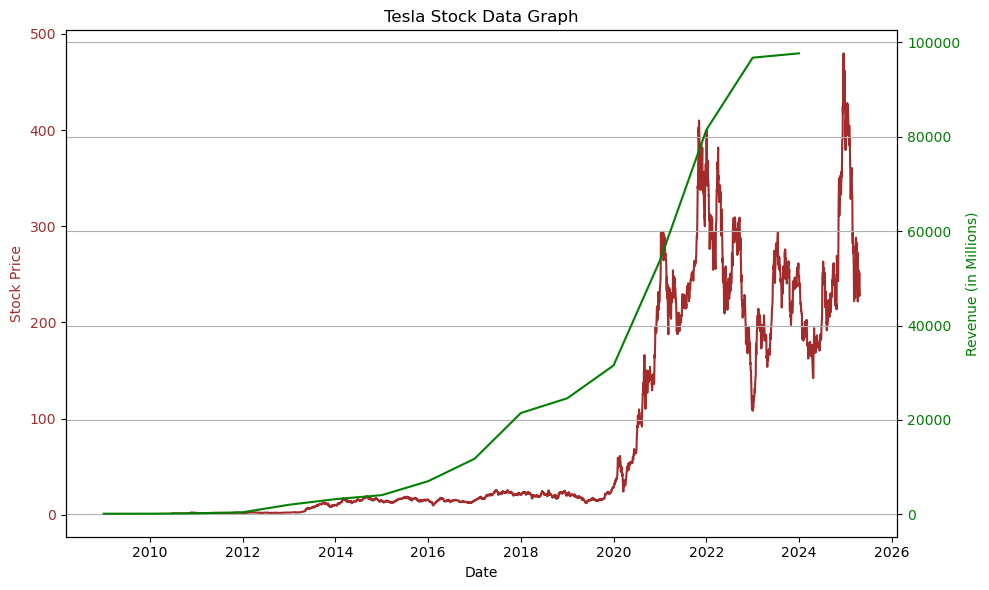

In [42]:
# Capture Stock Price and Company Revenue in a dashboard graph
def make_graph(TSLA_data, TSLA_revenue, title):
    TSLA_data['Date'] = pd.to_datetime(TSLA_data['Date'])
    TSLA_revenue['Date'] = pd.to_datetime(TSLA_revenue['Date'])
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(TSLA_data['Date'], TSLA_data['Close'], color='brown', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='brown')
    ax1.tick_params(axis='y', labelcolor='brown')
    ax2 = ax1.twinx()
    ax2.plot(TSLA_revenue['Date'], TSLA_revenue['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (in Millions)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.title(title)
    fig.tight_layout()
    plt.grid()
    plt.show()
make_graph(TSLA_data, TSLA_revenue, 'Tesla Stock Data Graph')

### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

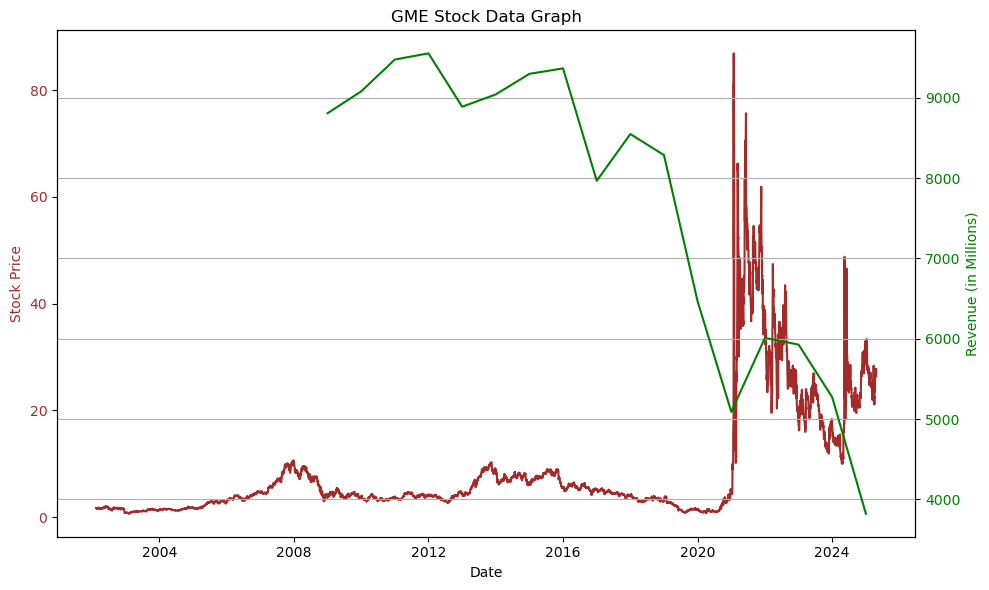

In [382]:
# Capture Stock Price and Company Revenue in a dashboard graph
def make_graph(GME_data, GME_revenue, title):
    GME_data['Date'] = pd.to_datetime(GME_data['Date'])
    GME_revenue['Date'] = pd.to_datetime(GME_revenue['Date'])
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.plot(GME_data['Date'], GME_data['Close'], color='brown', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='brown')
    ax1.tick_params(axis='y', labelcolor='brown')
    ax2 = ax1.twinx()
    ax2.plot(GME_revenue['Date'], GME_revenue['Revenue'], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (in Millions)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.title(title)
    fig.tight_layout()
    plt.grid()
    plt.show()
make_graph(GME_data, GME_revenue, 'GME Stock Data Graph')